In [114]:
import cv2
import numpy as np
import time
from matplotlib import pyplot as plt

img = cv2.imread('data/building.png')

## 邊緣檢測

邊緣檢測 cost 2.6021647453308105


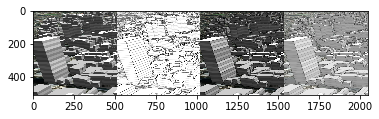

In [117]:
start_time = time.time()
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 對 x 方向做 Sobel 邊緣檢測
img_sobel_x = cv2.Sobel(img_grey, cv2.CV_16S, dx=1, dy=0, ksize=3)
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)

# 對 y 方向做 Sobel 邊緣檢測
img_sobel_y = cv2.Sobel(img_grey, cv2.CV_16S, dx=0, dy=1, ksize=3)
img_sobel_y = cv2.convertScaleAbs(img_sobel_y)

# x, y 方向的邊緣檢測後的圖各以一半的全重進行合成
img_sobel_combine = cv2.addWeighted(img_sobel_x, 0.5, img_sobel_y, 0.5, 0)
img2 = img.copy()
for i in range(img_sobel_combine.shape[0]):
    for j in range(img_sobel_combine.shape[1]):
        img_sobel_combine[i,j]=255-img_sobel_combine[i,j]
        if img_sobel_combine[i,j] < 255:
            img2[i,j,0]*=(img_sobel_combine[i,j]/255)
            img2[i,j,1]*=(img_sobel_combine[i,j]/255)
            img2[i,j,2]*=(img_sobel_combine[i,j]/255)


img_sobel_combine = cv2.cvtColor(img_sobel_combine, cv2.COLOR_GRAY2BGR)
img_sobel_combine2 = cv2.addWeighted(img, 0.5, img_sobel_combine, 0.5,0)

print('邊緣檢測 cost {}'.format(time.time() - start_time))

#　組合 + 顯示圖片
img_show = np.hstack((img, img_sobel_combine, img2, img_sobel_combine2))
img_lab = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_lab)